![alt text](https://www.freepnglogos.com/uploads/starbucks-logo-png-1.png)

# Geospatial and Exploratory Analysis of Starbucks Locations
-Jeremy Seibert


In this notebook, I will be exploring the Starbucks Store directory in search for answers to interesting questions, such as, what country or city has the most Starbucks? We will also explore the question on the difference between a Starbucks at Target and a Franchise-Store Starbucks, and how many of each type are there? Finally, we will end our exploration, by plotting each store on a Map using folium, a python wrapper on Leaflet.js. 

## A Brief History

Initially founded by Jerry Baldwin, Zev Siegl, and Gordon Bowker in 1971, Starbucks opened its first store at 1912 Pike's Place in Seattle, Washington. The future CEO, Howard Schultz joined with the young company in 1982 as the Director of Retail Operations & Marketing. In 1983, Schultz took his revolutionary trip across Italy, where fell in love with the concept of a "coffeehouse". Returning to the United States at the beginning of 1984, he explains the coffeehouse concept to the owner's, and convinces them to give it a try. The first Cafe Latte was sold later that year. After the coffeehouse experiment's success, Shultz stepped away from Starbuck's and founded II Giornale ,"The Jounal". 

From 1985-1987, Il Giornale grew substantially, and at the end of 1987 acquired the Starbuck's shop on Pike's Place. The acquisition then formed, what we know today as the Starbuck's Corporation. Before the end of 1987, there were 17 Starbucks Coffeehouses in cities such as Chicago, Vancouver, and Seattle. In 30 years, Starbuck's went from only 33 stores in 1988 to 25,600 stores worldwide. 


In [84]:
import numpy as np
import pandas as pd
import folium 
from folium import plugins
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. The Starbucks Store Directory

This directory contains the records of 26,000 plus Starbuck stores along with some additional information. Let's begin the exploration by reading in the file and viewing what information is available. 

In [85]:
#Read in the Store Directory file 
stores = pd.read_csv('./Dataset/directory.csv')
stores.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Y,X
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


## 2. Now let's explore the completeness of the directory

To do this, let us declare a function that will come in handy across several different proceeding questions. This function takes an object and a function as inputs and calculates the respective percents arising from the passed function. 

In [86]:
def percents(obj,func,agg=False,rnd=2):
    """This function calculates the aggregated or disaggregated percentages on set objects and functions.
    
    obj: The (list, series, DataFrame, tuple, set) object to be manipulated.
    func: The function that manipulates te object. 
    agg: Aggregates the calulations across multiple columns (i.e. A DataFrame)
    rnd: The number of decimals to round the results to.
    """
    if agg == True:
        pct = round(func(obj).sum() * 100/len(obj), rnd)
    else:
        pct = round(func(obj) * 100/len(obj), rnd)
    return pct

## 3. How many Null values are in the Directory?

Here let's use the percent function to calculate the percentage of Non-Null values within the DataFrame. In order to do so we pass the percent function several items. We start with the DataFrame containing the Starbucks stores, then the Pandas notnull function, and finally end by setting the agg arguement to True.  In doind this we discover that for the most part the directory is pretty complete, with the exception of the "Phone Number" Column. With the foresight into the completeness of the columns, we can begin to explore several other interesting components of this Starbucks store directory dataset. 

In the next section we will use the percent function to derive the International Market Saturation of Starbucks, and find the Top 5 countries with the most starbucks. 

In [87]:
nulls = percents(stores, pd.notnull, agg=True)
print(nulls)

Brand             100.00
Store Number      100.00
Store Name        100.00
Ownership Type    100.00
Street Address     99.99
City               99.94
State/Province    100.00
Country           100.00
Postcode           94.05
Phone Number       73.20
Timezone          100.00
Y                 100.00
X                 100.00
dtype: float64


## 4. What is the Country "International Market" Saturation of Starbucks?

As mentioned previously we can find the answer to this question again by using the percent function. In setting this up we pass the "Country" column of the DataFrame as the object, and the pandas value counts function as the function. Here because we want the value counts to aggregate the values in the column by unique Countries we leave the agg arguement defaulted to false. 

After doing this we find that the United States is the country with the most Starbucks holding 53% of stores. This is quickly proceeded by China at 10.68%, Canada at 5.73%, Japan at 4.83%, Korea at 3.88% and so on. Interesting.. Right? Now that we know the countries that have the most starbucks lets see the breakdown by city!

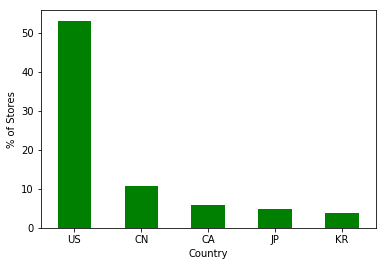

US    53.16
CN    10.68
CA     5.73
JP     4.83
KR     3.88
Name: Country, dtype: float64


In [88]:
country_saturations = percents(stores['Country'], pd.value_counts)
ax = country_saturations[:5].plot(kind='bar',color='green',rot=0)
ax.set_ylabel('% of Stores')
ax.set_xlabel('Country')
plt.show()
print(country_saturations[:5])

## 5. What cities across the world hold the most Starbucks?

Using the percent funtion on the "Cities" column in the exact same way as we did for the country saturations section, leads to the expected result. This would have been it for the section, except I got curious. When you run the percent function, we return several non-latin alphabetic scriptions of cities. I googled the first one, It is Shanghai. Then I googled the city below Vancouver, it is Seoul, South Korea. This presents a slight problem we already Seoul, the city written in latin-alphabetic charaters, which means that we are counting the same thing seperately. 

Theoretically we could setup a framwork to parse out the non-english text, and translate the other languages (Chinese, Korean, Arabic, etc). However, this is slightly beyond the scope of this notebook. So rather than going too in-depth, let us declare a dictionary containing the the largest foriegn cities in their native languages and the cities english counterpart. We will use this dictionary to better approximate the distribution of starbucks in cities
across the globe. 


In [9]:
city_saturations = percents(stores['City'], pd.value_counts)
print(city_saturations[:15])

上海市            2.12
Seoul          0.95
北京市            0.91
New York       0.91
London         0.84
Toronto        0.75
Mexico City    0.70
Chicago        0.70
Seattle        0.61
Las Vegas      0.61
Houston        0.60
Istanbul       0.56
Vancouver      0.55
서울             0.53
San Diego      0.53
Name: City, dtype: float64


### A. The Non-English Dictionary

Here we put together the the dictionary and it contains several of the non-english cities and there english counterparts. 

In [10]:
non_eng = {
    
    '上海市': 'Shanghai',
    '北京市': 'Beijing',
    '서울': 'Seoul',
    '杭州市': 'Hangzhou',
    '深圳市': 'Shenzhen',
    '广州市':'Guangzhou',
    '苏州市':'Suzhou',
    '天津市':'Tianjin',
    '张家口':'Zhangjiakou',
    '哈尔滨': 'Harbin',
    'المنامة':'Manama',
    '大连市':'Dalian',
    '长春市':'Changchun',
    '成都市':'Chengdu'
}

## 6. Starbucks Seoul!

Look! Now that we implemented that fix the percent of starbucks in Seoul, South Korea grew from 0.95% to 1.48%. This is because we include the 0.53% described by '서울'. These results are super surprising! Shanghai, China has more Starbucks than any other city in the world at 2.12%, and they are quickly followed by Seoul, Beijing, and New York.


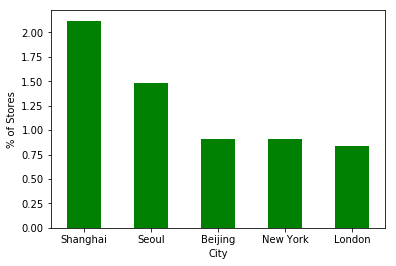

Shanghai       2.12
Seoul          1.48
Beijing        0.91
New York       0.91
London         0.84
Toronto        0.75
Chicago        0.70
Mexico City    0.70
Las Vegas      0.61
Seattle        0.61
Houston        0.60
Istanbul       0.56
Vancouver      0.55
San Diego      0.53
Calgary        0.51
Name: City, dtype: float64


In [14]:
stores.replace(non_eng,inplace=True)
city_saturations = percents(stores['City'], pd.value_counts)
ax = city_saturations[:5].plot(kind='bar',color='green',rot=0)
ax.set_ylabel('% of Stores')
ax.set_xlabel('City')
plt.show()
print(city_saturations[:15])

## 7. Who owns that Starbucks?

There are several different types of Starbuck's stores that you can buy your unicorn frappichino's at! These different stores can be broken down by ownership type. 

### Ownership Type

*Company-Owned Stores*

The most common type of Starbucks is the Company-Owned Stores. These are Starbucks which are ran directly by Starbucks Corporate. They follow the most up-to-date practices and procedures and often have the newest drinks. 

*Licensed Stores*

The next type of stores are the Licensed Stores which are independently ran, and abide by most of the same processes as the Company-Owned Starbucks. This is why your drink from a Target Starbucks might taste slightly different than the one at another store (think Target, Kroger, Barne's & Noble, etc.). 

*Joint-Venture Stores*

Another type of store are Joint Venture Stores, which are typically found outside North America and are Starbucks combined with another Company (think a Starbucks inside of a McDonalds).

*Franchise Stores*

The final type of store is the Francise Stores which are identical to Company-owned except that the General Manager is an owner of the store and has stake in its success/failure

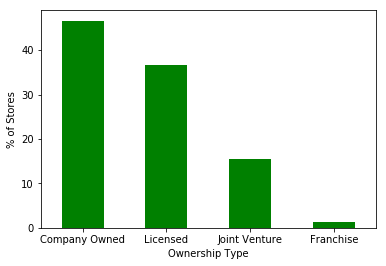

Company Owned    46.61
Licensed         36.62
Joint Venture    15.53
Franchise         1.24
Name: Ownership Type, dtype: float64


In [156]:
ownership_type = percents(stores['Ownership Type'], pd.value_counts)
ax = ownership_type.plot(kind='bar',color='green',rot=0)
ax.set_ylabel('% of Stores')
ax.set_xlabel('Ownership Type')
plt.show()
print(ownership_type)

### A. Joint-Venture Starbucks?

The reason why we see a greater amount of joint-venture stores outside of the US is due to the agglomeration of international food chains in foriegn countries. When you are in China you do have Chinese resteraunts, but rather they are just resteraunts. You do however have American resteraunts and these resteraunts offering American foods often have a tendency to agglomerate together (like a McDonalds, and Starbucks in one store). 

In [34]:
#Chinese and US-only DataFrames
chinese_bucks = stores.loc[stores['Country'] == 'CN']
us_bucks = stores.loc[stores['Country'] == 'US']

#Ownership-Type by Country
us_own_type = percents(us_bucks['Ownership Type'], pd.value_counts)
cn_own_type = percents(chinese_bucks['Ownership Type'], pd.value_counts)

#Print the Distributions
print('---------------------------------')
print('US Stores')
print(us_own_type)
print('---------------------------------')
print('Chinese Stores')
print(cn_own_type)
print('---------------------------------')

---------------------------------
US Stores
Company Owned    60.45
Licensed         39.55
Name: Ownership Type, dtype: float64
---------------------------------
Chinese Stores
Company Owned    48.98
Joint Venture    44.62
Licensed          6.40
Name: Ownership Type, dtype: float64
---------------------------------


## 8. Where are these Stores?

In this final section we will use Folium a super simple package that make building maps a very easy process! Here we will build a tool that is fun and useful. We are going to build a tool that will plot a map of every starbucks and its phone number in a given country.

Let's begin by writing two functions that will slice the stores data frame based on cities (def cities) or on countries (def countries). These will be used in our next function which will allow the user to select whether they want to choose a country or a city to map(def cities_or_countries). From there lets use the inputs to map the Starbucks from the selected city or country (def create_map). In the create map function we can also give the user the opportunity to save the map that they created!

In [89]:
def cities(c):
    """ This function slices by the stores dataframe by the given param city (c)."""
    try:
        local_bucks = stores.loc[stores['City'] == c]
    except(AttributeError, TypeError):
        raise AssertionError('Input cities should be strings')
    return local_bucks

def countries(c):
    """ This function slices by the stores dataframe by the given param country (c)."""
    try:
        local_bucks = stores.loc[stores['Country'] == c]
    except(AttributeError, TypeError):
        raise AssertionError('Input variables should be strings')
    return local_bucks

def cities_or_counties():
    """ This function gives allows the user to select a City or a Country as their input."""
    q1 = str(input('Do you want to map a City or a Country?: '))
    global q2
    if q1 == 'City':
        q2 = str(input('What is the City Name in English?: '))
        local_bucks = cities(q2)
    elif q1 == 'Country':
        q2 = str(input('What is the Country Abbreviation in English?: '))
        local_bucks = countries(q2)
    else:
        raise AssertionError('Entries must be strings of City or Country')
    return local_bucks

def create_map(save=False):
    """This function generates a map on the selected country or city, and makes markers of the stores and phone numbers
    
    save: If the user wants to save the Map as an HTML output."""
    try:
        local_bucks = cities_or_counties()
        location = local_bucks[['X','Y']]
        local_bucks['Phone Number'].fillna('NONE', inplace=True)
        locationList = location.values.tolist()
        US_Coordinates = (37.0902, -95.7129)
        map1 = folium.Map(location=US_Coordinates, tiles='CartoDB dark_matter', zoom_start=3)
        marker_cluster = folium.plugins.MarkerCluster().add_to(map1)
        for i in range(0, len(locationList)):
            folium.Marker(locationList[i], popup=local_bucks['Phone Number'].iloc[i],icon=folium.Icon(color='green', icon_color='white', icon='info-sign')).add_to(marker_cluster)
        if save == True:
            map1.save(outfile='./Map/{}_Starbucks_Stores.html'.format(q2))
            print('Your map for {} has been saved!'.format(q2))
        else:
            pass
    except:
        pass
    return map1

stores_map = create_map(save=True)
stores_map

Do you want to map a City or a Country?:  City
What is the City Name in English?:  New York


Your map for New York has been saved!


## 9. Woohoo! Thanks for reading. 

I hope you enjoyed reading through this notebook! This was alot of fun for me to get to put together. If you are as much of a coffee drinker as I hope you especially appreciate the tool at the end!
